Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

* The temperature
* The mean temperature each day
* The mean temperature for each month


Plot:

* The Windspeed (there is data missing from this column)
* The rolling windspeed (say over 24 hours)
* The max windspeed for each day
* The monthly mean of the daily max windspeeds (yer I am being nasty here)

You do not need to over comment your code. Marks will be given for how nice the plots are.

In [915]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [916]:

df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv", skiprows=19)
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,
1,1996,10,9.7,,,12.5,7.0,,,,,
2,1996,11,5.0,,,7.6,2.5,,,,,


In [917]:
df["day"]=1
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1,1996,10,9.7,,,12.5,7.0,,,,,,1
2,1996,11,5.0,,,7.6,2.5,,,,,,1


In [918]:
df['date']=pd.to_datetime(df[['year', 'month', 'day']])
df['date']

0     1996-08-01
1     1996-10-01
2     1996-11-01
3     1996-12-01
4     1997-01-01
         ...    
344   2025-05-01
345   2025-06-01
346   2025-07-01
347   2025-08-01
348   2025-09-01
Name: date, Length: 349, dtype: datetime64[ns]

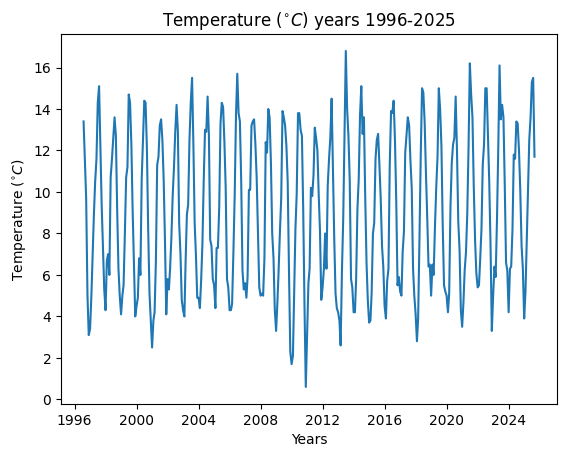

In [919]:


# plot the mean temperature from the dataset from 1996 to 2025

fig, ax = plt.subplots()

sns.lineplot(data=df, x="date", y="meant", ax=ax)

# Use raw strings (r"...") to prevent invalid escape warnings
ax.set_ylabel(r'Temperature ($^{\circ}C$)')
ax.set_xlabel('Years')
ax.set_title(r'Temperature ($^{\circ}C$) years 1996-2025')

plt.show()

Resampled 10624 daily points from 349 total data points.


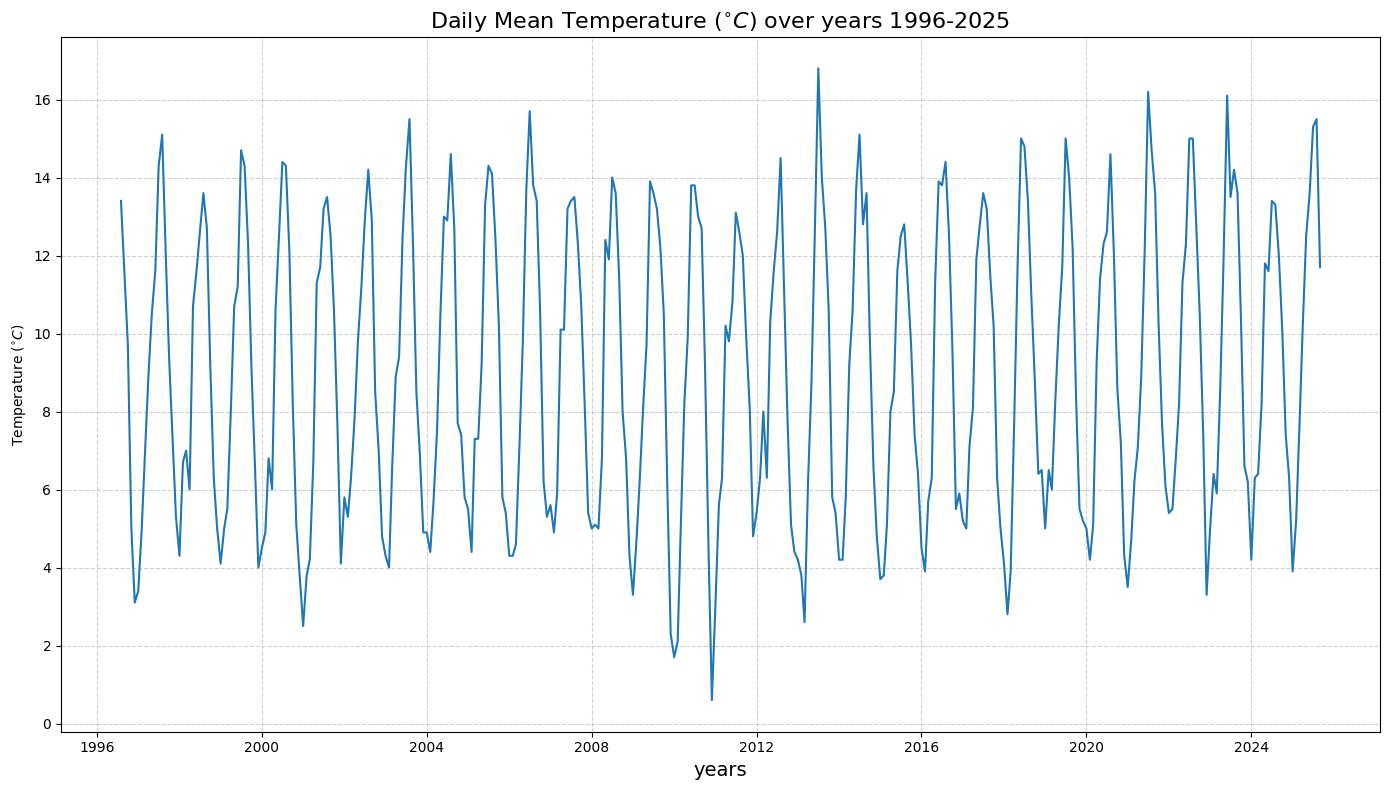

In [920]:
# daily mean temperature from 1996 to 2025

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# define the function to filter the date range
df_indexed = df.set_index('date').loc['1996-01-01':'2025-12-31']

# Resample to daily mean temperature
mean_daily_temp = df_indexed['meant'].resample('D').mean()

print(f"Resampled {mean_daily_temp.shape[0]} daily points from {df.shape[0]} total data points.")

# Plot daily mean temperature
plt.figure(figsize=(14, 8))
sns.lineplot(x=mean_daily_temp.index, y=mean_daily_temp.values)

# Label and style the plot
plt.title(r'Daily Mean Temperature ($^{\circ}C$) over years 1996-2025', fontsize=16)
plt.xlabel('years', fontsize=14)
plt.ylabel(r'Temperature ($^{\circ}C$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

There are 350 monthly averages from 349 original data points


C:\Users\finia\AppData\Local\Temp\ipykernel_9572\1259848589.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mean_monthly_temp = df_indexed['meant'].resample('M').mean()


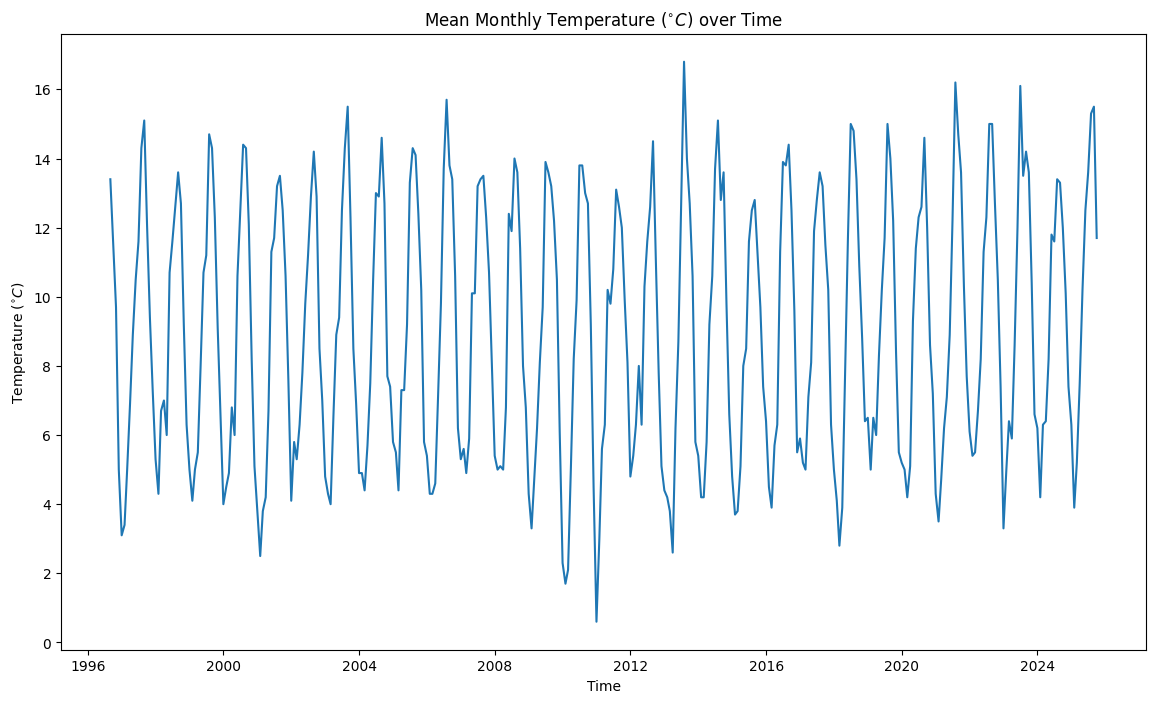

In [921]:
# Calculate mean temperature per month

mean_monthly_temp = df_indexed['meant'].resample('M').mean()

print(f"There are {mean_monthly_temp.shape[0]} monthly averages from {df.shape[0]} original data points")

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(x=mean_monthly_temp.index, y=mean_monthly_temp.values, ax=ax)

# Label the plot
ax.set_ylabel(r'Temperature ($^{\circ}C$)')
ax.set_xlabel('Time')
ax.set_title(r'Mean Monthly Temperature ($^{\circ}C$) over Time')

plt.show()

In [922]:
# calculate the wind speed over 24 hours
# detering misssing values
df_indexed['wdsp'].isna().sum()


np.int64(0)

In [923]:
# count the unique values in the wind speed column
df_indexed['wdsp'].value_counts()

wdsp
8.8     18
8.3     13
8.6     13
9.4     13
9.1     12
        ..
6.8      1
7.2      1
13.6     1
13.5     1
11.7     1
Name: count, Length: 68, dtype: int64

In [924]:
# count how many values start with a space
df_indexed['wdsp'].str.startswith(' ').sum()

np.int64(2)

In [925]:
# replace values that start with a space with NaN
df_indexed['wdsp'] = np.where(df_indexed['wdsp'].str.startswith(' '), np.nan, df_indexed['wdsp'])

In [926]:
# check how many missing values are there now
df_indexed['wdsp'].isna().sum()

np.int64(2)

In [927]:
# fill missing values with backfill method
df_indexed['wdsp'] = df_indexed['wdsp'].bfill()

In [928]:
# check how many missing values are there now
df_indexed['wdsp'].isna().sum()

np.int64(0)

In [929]:
# convert wind speed to numeric
df_indexed['wdsp'] = pd.to_numeric(df_indexed['wdsp'], errors='coerce')
mean_daily_windspeed = df_indexed['wdsp'].resample('D').mean() # resampling per day

There are 10624 resampled daily points from 349 data points


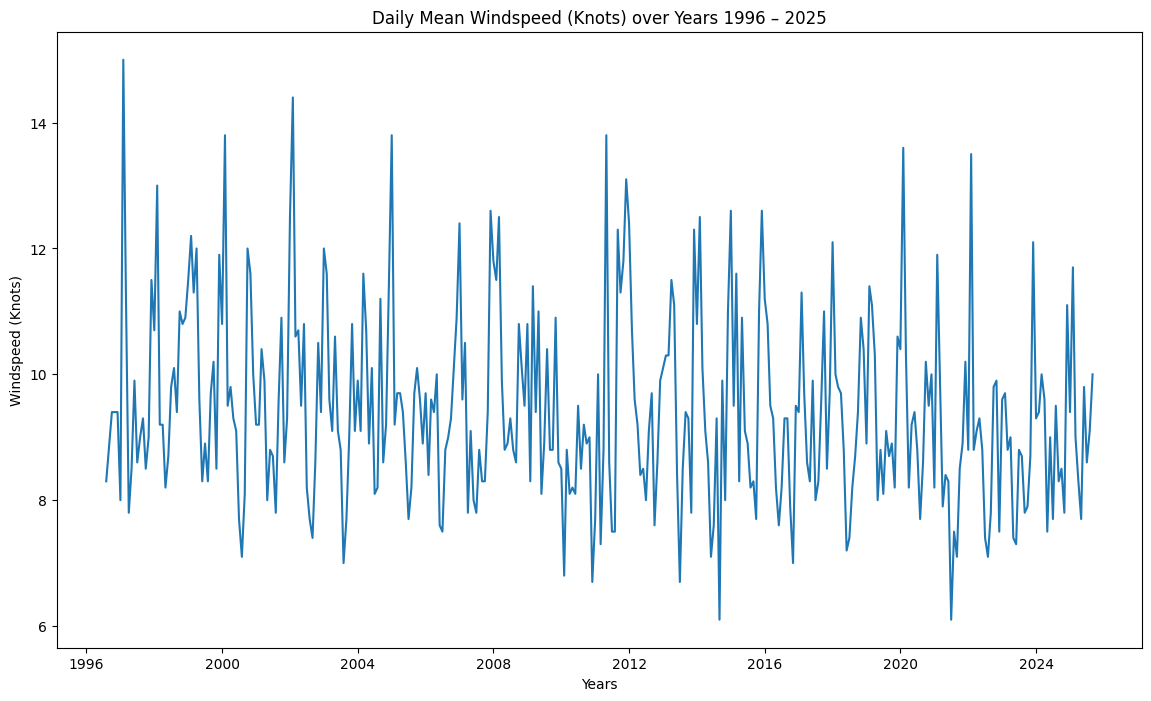

In [930]:
# Calculate mean wind speed per day
mean_daily_windspeed = df_indexed['wdsp'].resample('D').mean()  # 'D' = daily frequency
print(f"There are {mean_daily_windspeed.shape[0]} resampled daily points from {df_indexed.shape[0]} data points")

# Plot mean daily windspeed
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(data=mean_daily_windspeed)
ax.set_ylabel('Windspeed (Knots)')
ax.set_xlabel('Years')
ax.set_title('Daily Mean Windspeed (Knots) over Years 1996 – 2025')
plt.show()


In [931]:
# count how many values start with a space
df_indexed['maxgt'].str.startswith(' ').sum()

np.int64(5)

In [932]:
df_indexed['maxgt'].value_counts()

maxgt
40    24
44    21
46    19
48    19
38    17
42    15
41    13
53    13
37    13
36    10
39    10
49    10
32    10
58     9
35     9
45     9
33     8
52     8
50     8
34     7
59     7
54     7
43     6
55     6
62     6
30     6
31     6
56     6
51     5
       5
63     5
47     5
60     4
65     4
57     4
61     3
68     3
84     2
64     2
71     1
79     1
27     1
29     1
67     1
Name: count, dtype: int64

In [933]:
df_indexed['maxgt'].str.startswith(' ').sum()

np.int64(5)

In [934]:
df_indexed['maxgt'] = np.where(df_indexed['maxgt'].str.startswith(' '), np.nan, df_indexed['maxgt'])

In [935]:

df_indexed['maxgt'].isna().sum()

np.int64(5)

In [936]:
# fill missing values with backfill method
df_indexed['maxgt'] = df_indexed['maxgt'].bfill()

In [937]:
# check how many missing values are there now
df_indexed['maxgt'].isna().sum()

np.int64(0)

In [938]:
# convert wind speed to numeric
df_indexed['maxgt'] = pd.to_numeric(df_indexed['maxgt'], errors='coerce')
mean_daily_maxgt = df_indexed['maxgt'].resample('D').mean() # resampling per day

There are 10624 resampled daily points from 349 data points


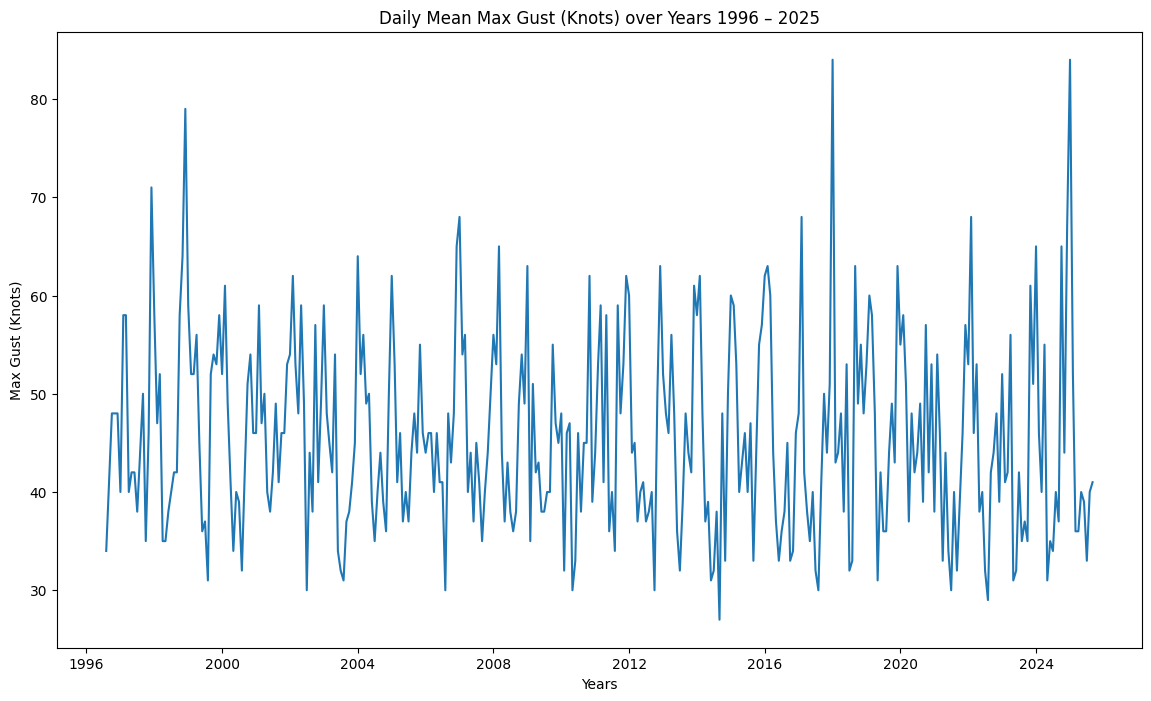

In [939]:
# Calculate mean wind speed per day
mean_daily_maxgt = df_indexed['maxgt'].resample('D').mean()  # 'D' = daily frequency
print(f"There are {mean_daily_maxgt.shape[0]} resampled daily points from {df_indexed.shape[0]} data points")

# Plot mean daily max gust
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(data=mean_daily_maxgt)
ax.set_ylabel('Max Gust (Knots)')
ax.set_xlabel('Years')
ax.set_title('Daily Mean Max Gust (Knots) over Years 1996 – 2025')
plt.show()

C:\Users\finia\AppData\Local\Temp\ipykernel_9572\3140443324.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mean_month_maxgt = df_indexed['maxgt'].resample('M').mean()


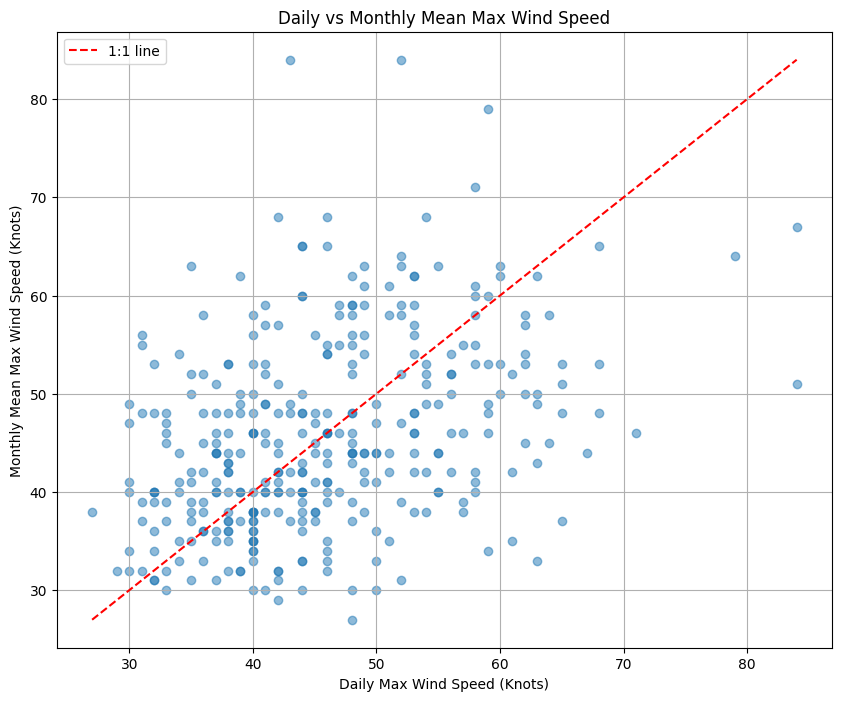

In [940]:


# Calculate monthly mean of max gust
mean_month_maxgt = df_indexed['maxgt'].resample('M').mean()

# Resample to monthly frequency and forward fill the monthly values to daily
monthly_to_daily = mean_month_maxgt.reindex(mean_daily_maxgt.index, method='ffill')

# Remove any NaN values
mask = ~(mean_daily_maxgt.isna() | monthly_to_daily.isna())
x = mean_daily_maxgt[mask]
y = monthly_to_daily[mask]

# Plot
plt.figure(figsize=(10,8))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Daily Max Wind Speed (Knots)')
plt.ylabel('Monthly Mean Max Wind Speed (Knots)')
plt.title('Daily vs Monthly Mean Max Wind Speed')
plt.grid(True)

# Add a diagonal line for reference
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='1:1 line')
plt.legend()

plt.show()


C:\Users\finia\AppData\Local\Temp\ipykernel_9572\3988176578.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mean_month_maxgt = df_indexed['maxgt'].resample('M').mean()  # 'M' = monthly frequency


There are 10624 resampled daily points from 349 data points


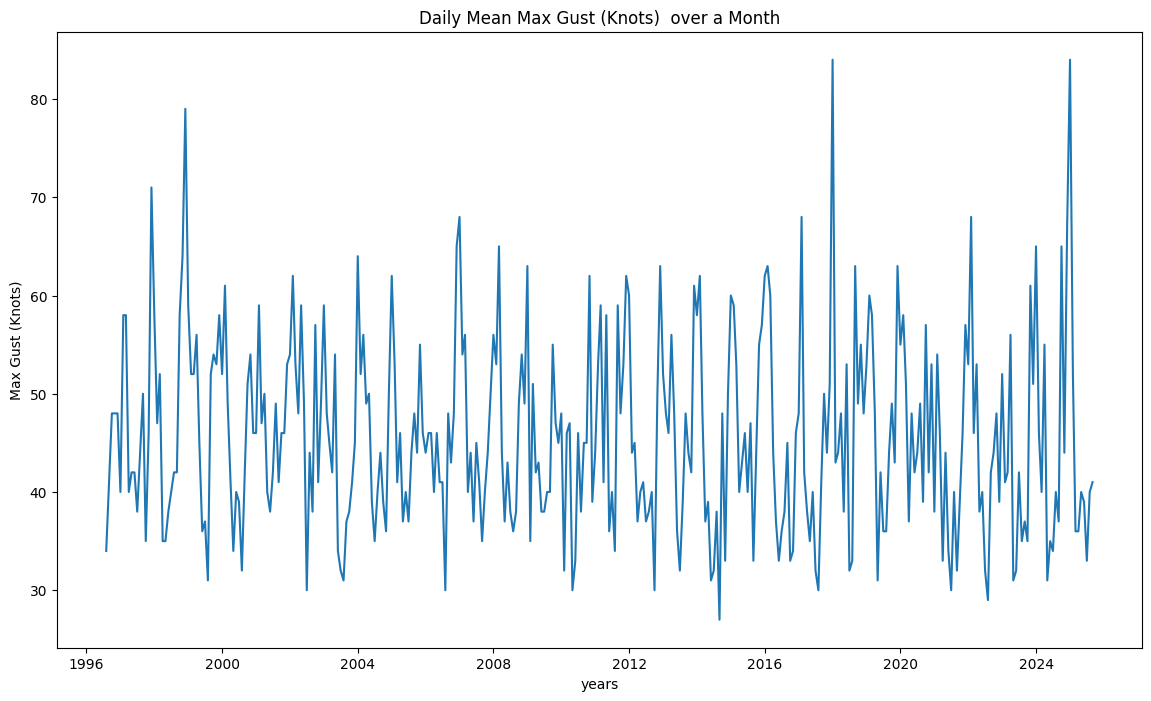

In [941]:
# Calculate max wind speed per day for a month
mean_month_maxgt = df_indexed['maxgt'].resample('M').mean()  # 'M' = monthly frequency
mean_daily_maxgt = df_indexed['maxgt'].resample('D').mean()  # 'D' = daily frequency

print(f"There are {mean_daily_maxgt.shape[0]} resampled daily points from {df_indexed.shape[0]} data points")

# Plot daily max gust per month
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(data=mean_daily_maxgt)
ax.set_ylabel('Max Gust (Knots)')
ax.set_xlabel('years')
ax.set_title('Daily Mean Max Gust (Knots)  over a Month')
plt.show()